In [1]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np


In [2]:
trads = pd.read_csv('/content/historical_data.csv')
trads.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.003055,1.050000e+15,1.730000e+12


In [3]:
fng = pd.read_csv("/content/fear_greed_index.csv")
fng.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [5]:
trads.isnull().sum()


,0
Account,0
Coin,0
Execution Price,0
Size Tokens,0
Size USD,0
Side,0
Timestamp IST,0
Start Position,0
Direction,0
Closed PnL,0


In [7]:
trads.dropna(inplace=True)


In [9]:
trads.isnull().sum()

,0
Account,0
Coin,0
Execution Price,0
Size Tokens,0
Size USD,0
Side,0
Timestamp IST,0
Start Position,0
Direction,0
Closed PnL,0


In [10]:
fng.isnull().sum()

,0
timestamp,0
value,0
classification,0
date,0


In [11]:
fng.describe()

,timestamp,value
count,2.644000e+03,2644.000000
mean,1.631899e+09,46.981089
std,6.597967e+07,21.827680
min,1.517463e+09,5.000000
25%,1.574811e+09,28.000000
50%,1.631900e+09,46.000000
75%,1.688989e+09,66.000000
max,1.746164e+09,95.000000


In [12]:
trads.columns

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')

In [13]:
trads.columns=trads.columns.str.lower().str.replace(' ','_')
trads.head()

,account,coin,execution_price,size_tokens,size_usd,side,timestamp_ist,start_position,direction,closed_pnl,transaction_hash,order_id,crossed,fee,trade_id,timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.003055,1.050000e+15,1.730000e+12


In [14]:
fng.columns=fng.columns.str.lower()
fng.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [15]:
fng.dtypes

,0
timestamp,int64
value,int64
classification,object
date,object


In [16]:
trads.dtypes

,0
account,object
coin,object
execution_price,float64
size_tokens,float64
size_usd,float64
side,object
timestamp_ist,object
start_position,float64
direction,object
closed_pnl,float64


In [17]:
trads['timestamp_ist']=pd.to_datetime(trads['timestamp_ist'], errors='coerce').dt.date
trads.head()

,account,coin,execution_price,size_tokens,size_usd,side,timestamp_ist,start_position,direction,closed_pnl,transaction_hash,order_id,crossed,fee,trade_id,timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-02-12,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-02-12,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-02-12,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-02-12,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-02-12,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.003055,1.050000e+15,1.730000e+12


In [18]:
fng['date'] = pd.to_datetime(fng['date']).dt.date
fng.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [19]:
merged = trads.merge(fng, left_on="timestamp_ist", right_on="date", how="left")
merged.head()

,account,coin,execution_price,size_tokens,size_usd,side,timestamp_ist,start_position,direction,closed_pnl,transaction_hash,order_id,crossed,fee,trade_id,timestamp_x,timestamp_y,value,classification,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-02-12,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.345404,8.950000e+14,1.730000e+12,1.707716e+09,70.0,Greed,2024-02-12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-02-12,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.005600,4.430000e+14,1.730000e+12,1.707716e+09,70.0,Greed,2024-02-12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-02-12,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.050431,6.600000e+14,1.730000e+12,1.707716e+09,70.0,Greed,2024-02-12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-02-12,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.050043,1.080000e+15,1.730000e+12,1.707716e+09,70.0,Greed,2024-02-12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-02-12,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.003055,1.050000e+15,1.730000e+12,1.707716e+09,70.0,Greed,2024-02-12


In [20]:
merged['win'] = (merged['closed_pnl'] > 0).astype(int)
merged['notional'] = merged['size_tokens'] * merged['execution_price']
merged

,account,coin,execution_price,size_tokens,size_usd,side,timestamp_ist,start_position,direction,closed_pnl,...,crossed,fee,trade_id,timestamp_x,timestamp_y,value,classification,date,win,notional
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87000,7872.16,BUY,2024-02-12,0.000000,Buy,0.000000,...,True,0.345404,8.950000e+14,1.730000e+12,1.707716e+09,70.0,Greed,2024-02-12,0,7872.163303
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00000,127.68,BUY,2024-02-12,986.524596,Buy,0.000000,...,True,0.005600,4.430000e+14,1.730000e+12,1.707716e+09,70.0,Greed,2024-02-12,0,127.680000
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09000,1150.63,BUY,2024-02-12,1002.518996,Buy,0.000000,...,True,0.050431,6.600000e+14,1.730000e+12,1.707716e+09,70.0,Greed,2024-02-12,0,1150.630695
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98000,1142.04,BUY,2024-02-12,1146.558564,Buy,0.000000,...,True,0.050043,1.080000e+15,1.730000e+12,1.707716e+09,70.0,Greed,2024-02-12,0,1142.038452
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73000,69.75,BUY,2024-02-12,1289.488521,Buy,0.000000,...,True,0.003055,1.050000e+15,1.730000e+12,1.707716e+09,70.0,Greed,2024-02-12,0,69.747462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23279,0x4f93fead39b70a1824f981a54d4e55b278e9f760,BTC,66194.0000,0.16090,10650.61,SELL,NaT,-1.657580,Open Short,0.000000,...,True,3.727715,6.350000e+14,1.730000e+12,NaN,NaN,NaN,NaN,0,10650.614600
23280,0x4f93fead39b70a1824f981a54d4e55b278e9f760,BTC,64494.0000,0.77380,49905.46,BUY,NaT,-1.818480,Close Short,1153.426280,...,True,17.466910,4.750000e+14,1.730000e+12,NaN,NaN,NaN,NaN,1,49905.457200
23281,0x4f93fead39b70a1824f981a54d4e55b278e9f760,BTC,64494.0000,0.24281,15659.79,BUY,NaT,-1.044680,Close Short,361.932586,...,True,5.480925,5.350000e+14,1.730000e+12,NaN,NaN,NaN,NaN,1,15659.788140
23282,0x4f93fead39b70a1824f981a54d4e55b278e9f760,BTC,64494.0000,0.22662,14615.63,BUY,NaT,-0.801870,Close Short,337.799772,...,True,5.115470,6.850000e+14,1.730000e+12,NaN,NaN,NaN,NaN,1,14615.630280


In [21]:
summary = merged.groupby('classification').agg(
    trades=('account','count'),
    win_rate=('win','mean'),
    total_volume=('notional','sum'),
    avg_pnl=('closed_pnl','mean')
).reset_index()

print(summary)

  classification  trades  win_rate  total_volume     avg_pnl
0   Extreme Fear      67  0.000000  2.131841e+05    0.000000
1  Extreme Greed     678  0.221239  4.299319e+06 -113.061391
2           Fear    2603  0.435267  3.957804e+07  477.347680
3          Greed    1391  0.381021  1.967304e+07   14.377992
4        Neutral      80  0.487500  8.767544e+05  171.217109


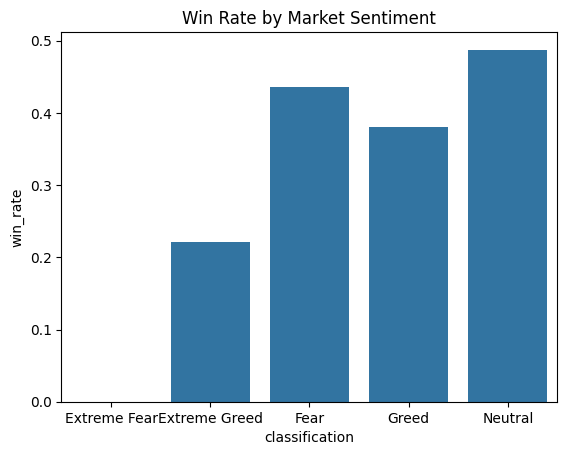

In [22]:
sn.barplot(data=summary, x="classification", y="win_rate")
plt.title("Win Rate by Market Sentiment")
plt.show()

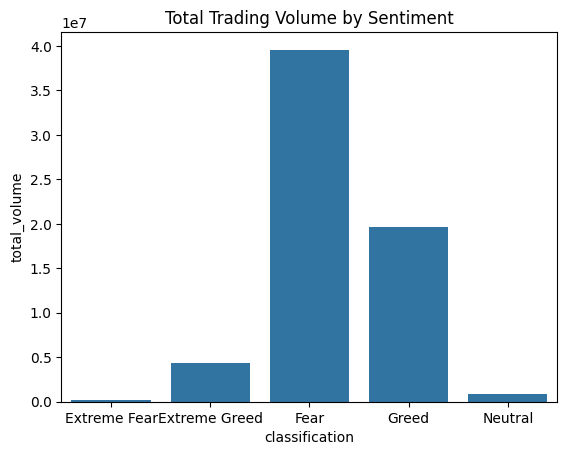

In [23]:
sn.barplot(data=summary, x="classification", y="total_volume")
plt.title("Total Trading Volume by Sentiment")
plt.show()

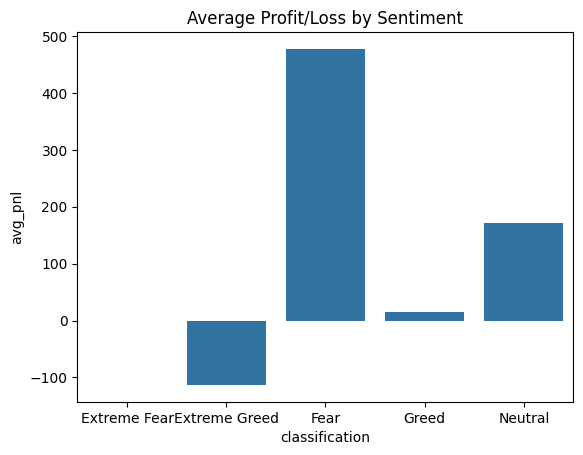

In [24]:
sn.barplot(data=summary, x="classification", y="avg_pnl")
plt.title("Average Profit/Loss by Sentiment")
plt.show()

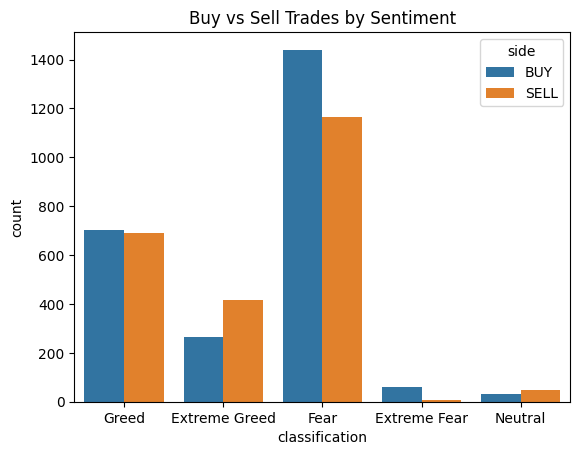

In [25]:
sn.countplot(data=merged, x="classification", hue="side")
plt.title("Buy vs Sell Trades by Sentiment")
plt.show()


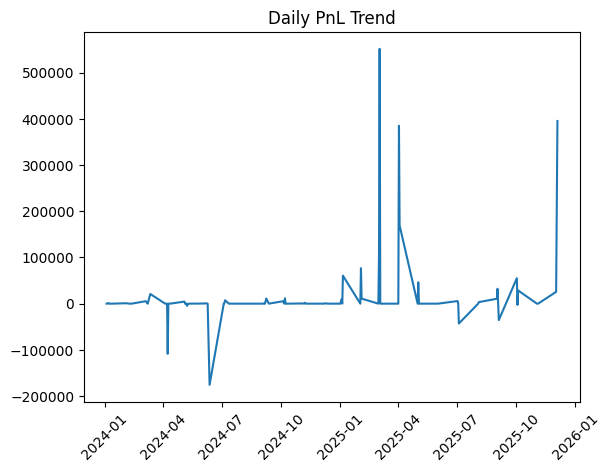

In [26]:
daily_pnl = merged.groupby('timestamp_ist')['closed_pnl'].sum().reset_index()
plt.plot(daily_pnl['timestamp_ist'], daily_pnl['closed_pnl'])
plt.title("Daily PnL Trend")
plt.xticks(rotation=45)
plt.show()

In [27]:
import os

if not os.path.exists('csv_files'):
    os.makedirs('csv_files')

summary.to_csv("csv_files/kpi_by_sentiment.csv", index=False)

In [28]:
df=pd.read_csv("/content/csv_files/kpi_by_sentiment.csv")
df

,classification,trades,win_rate,total_volume,avg_pnl
0,Extreme Fear,67,0.000000,2.131841e+05,0.000000
1,Extreme Greed,678,0.221239,4.299319e+06,-113.061391
2,Fear,2603,0.435267,3.957804e+07,477.347680
3,Greed,1391,0.381021,1.967304e+07,14.377992
4,Neutral,80,0.487500,8.767544e+05,171.217109
